In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso

import warnings
warnings.filterwarnings("ignore")

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
wangzemeng925


ValueError: ignored

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
W9Z2meng5(@%513


ValueError: ignored

In [ ]:
file_path = '/content/drive/MyDrive/EC503/Coding/FeatureSelect/factors_All.xlsx'
data = pd.read_excel(io=file_path, header=1, usecols=range(1, 212))
data_norm = preprocessing.normalize(data, norm='l2', axis=0, copy=True, return_norm=False)

# sklearn Kernel-PCA
kpca = KernelPCA(n_components=30, kernel='rbf', fit_inverse_transform = True)
X_trans = kpca.fit_transform(data_norm)
X_reconst = kpca.inverse_transform(X_trans)
diff = X_reconst - data_norm
# d = np.sum(np.column_stack([np.linalg.norm(diff[i]) for i in range(20)]))

In [ ]:
diff.shape

(190, 211)

Text(0, 0.5, 'Eigenvalues')

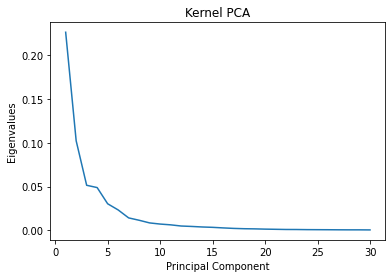

In [ ]:
plt.figure(1)
x = np.arange(1,31)
plt.plot(x, kpca.eigenvalues_)
plt.title('Kernel PCA')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalues')

In [ ]:
## PCA
pca = PCA(n_components=30) # "mle" or number or ratio
x_dr = pca.fit_transform(data_norm)
num = pca.explained_variance_ratio_.shape[0]
np.cumsum(pca.explained_variance_ratio_)

array([0.39882909, 0.57872094, 0.66895759, 0.75487296, 0.80823159,
       0.84923499, 0.87420836, 0.89437624, 0.90916403, 0.9217115 ,
       0.93275117, 0.94142711, 0.94921805, 0.95595527, 0.96197035,
       0.96681534, 0.97066157, 0.97390758, 0.97683612, 0.97924138,
       0.98128669, 0.98300081, 0.9846343 , 0.98602786, 0.9873326 ,
       0.98853302, 0.98960235, 0.99059202, 0.99157163, 0.99240563])

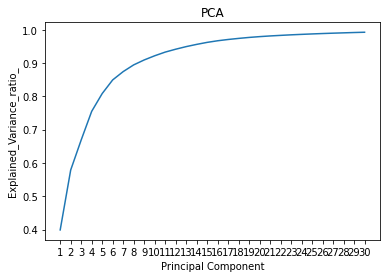

In [ ]:

plt.plot(list(range(1,num+1)), np.cumsum(pca.explained_variance_ratio_))
plt.xticks(list(range(1,num+1)))
plt.title('PCA')
plt.xlabel('Principal Component')
plt.ylabel('Explained_Variance_ratio_')
plt.show()